## Pythonで実践するグラフ因果推論入門
## 第2回：構造方程式モデリングの基礎
##（semopyを使ったSEM）

url : https://www.salesanalytics.co.jp/datascience/datascience231/

今回のブログシリーズ『Pythonで実践するグラフ因果推論入門』の第2回では、「構造方程式モデリングの基礎（semopyを使ったSEM）」に焦点を当てています。

このシリーズの第1回では、因果グラフモデルの概念を紹介し、CausalGraphicalModelsを使って因果関係を視覚化する方法を学びました。

url: https://www.salesanalytics.co.jp/datascience/datascience230/

これは、あくまでも仮説やドメイン知識などもとに定性的にDAGを作っていくアプローチです。

そこで得た知識を基に、モデルを定量化するアプローチが必要になります。そこで登場する方法の1つが構造方程式モデリング（SEM）です。

SEMは、因果関係の分析において非常に強力なツールであり、観測変数と潜在変数の両方を含めることができるため、複雑な因果モデルを構築する際に役立ちます。

今回は、SEMの基本から、semopyライブラリを使ったモデル構築方法までを簡単に解説していきます。SEMの理解を深め、実際のデータに適用する方法を学んでいきましょう。



## はじめに

構造方程式モデリング（SEM）は、因果関係の分析において広く用いられる統計的手法です。

SEMは特に複雑なデータ構造において、変数間の因果関係をモデル化し、直接的および間接的な影響を同時に推定する能力を持っています。

この手法では、観測変数と潜在変数の両方を含めることが可能で、変数間の構造的な関係を表現できます。

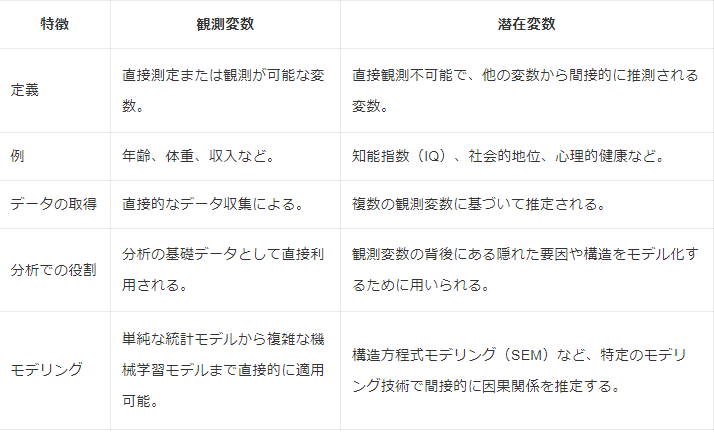

## Python用のSEMライブラリsemopy
## semopyとは？

semopyはPython用のSEMライブラリであり、非常に使いやすいものです。

url: https://semopy.com/

このライブラリを使うことで、モデルの定義、推定、評価までの一連のプロセスを容易に行うことができます。

semopyを用いたSEMの実施は、パス解析とは異なり、潜在変数を用いて多変量の依存関係を同時に考慮することができるため、より洗練された分析が可能になります。

しかし、semopyは量的変数の関係性を分析するために設計されています。そのため、質的変数（カテゴリカル変数）を扱う場合には、限界があります。

質的変数（カテゴリカル変数）をワンホットエンコードし0-1変数に変換した後に、semopyでSEMを構築するという方法もありますが、限界もあります。線形回帰モデルの考え方を使っているからです。

質的変数（カテゴリカル変数）が目的変数となるSEMの場合、ロジスティック回帰などを仮定しますが、semopyにはその機能はありません。

R言語のlavaanライブラリを使うか、ロジスティック回帰モデルをパスごとに独立して推定するパス解析を実施するか、どちらかになることでしょう。

url: https://lavaan.ugent.be/

## semopyのセットアップ

semopyを用いた構造方程式モデリングの実践には、まず適切なセットアップが必要です。

semopyのインストールはPythonのpipコマンドを用いて簡単に行うことができます。

ターミナルまたはJupyter Notebook上で以下のコマンドを実行してください。



In [1]:
pip install semopy

このコマンドにより、semopyとその依存ライブラリがシステムにインストールされます。

## semopyによる簡易SEM分析例

収入（Income）が教育（Education）と健康（Health）にどう影響するかを表す例を用います。

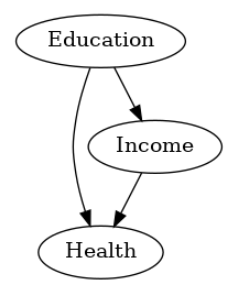

## モデルの定義

SEMを定義します。

以下、コードです。

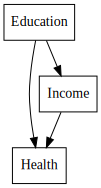

In [2]:
from semopy import Model
from semopy import plot

# モデル記述
model_desc = """
Health ~ Income + Education
Income ~ Education
"""

# モデルのインスタンス
model = Model(model_desc)

# DAGの表示
plot.semplot(model, 'output_semplot.png')

CausalGraphicalModelsのDAG表記では、変数を円で囲っていましたが、こちらは四角で囲っています。

SEMの場合、四角で囲うのが観測変数（手元にあるデータの変数）で、円で囲うのが潜在変数（例：因子分析の因子のようなもので、直接観測しデータを得ることができない）になります。

今回の例は、観測変数のみのため、四角で囲まれた変数しかございません。

今回の以下のモデル記述の内容を、簡単に説明します。

    モデル記述
    model_desc = """
    Health ~ Income + Education
    Income ~ Education
    """

1行目の以下の式は、健康状態（Health）が収入（Income）と教育（Education）によってどのように決定されるかをモデル化しています。

    1行目の式： Health ~ Income + Education

つまり、健康状態は収入と教育に依存する目的変数とした回帰式を表しています。

2行目の以下の式は、収入が教育によってどのように決定されるかをモデル化しています。

    2行目の式： Income ~ Education

つまり、収入は教育のレベルに依存する目的変数とした回帰式を表しています。

このモデル記述により、教育が直接的に収入に影響を与え、収入と教育の両方が健康状態に影響を与えるという因果関係が設定されています。

このようなモデルは、教育が健康に与える直接的な影響と、収入を介した間接的な影響を区別して評価することを可能にします。

## データの準備

SEMに使用するデータは、pandas DataFrame形式で用意します。ここでは、乱数を使い架空のデータを生成して使用します。

以下、コードです。架空のデータを生成しています。



In [3]:
import numpy as np
import pandas as pd

# サンプルデータのサイズ
n_samples = 1000

# 乱数のシードを設定
np.random.seed(42)

# Educationは一般的に正規分布に従うと仮定する
# 教育レベル（仮想的な数値スケール、例えば学校年数を想定）
education = np.random.normal(12, 2, n_samples)

# IncomeはEducationに依存。正規分布のノイズが加わる
# 教育年数に応じて収入が増加すると仮定
income = 3000 + 500 * education + np.random.normal(0, 1000, n_samples)

# HealthはIncomeとEducationの両方に依存。正規分布のノイズが加わる
# 収入と教育が高いほど健康状態が良いと仮定
health = 50 + 3 * income + 50 * education + np.random.normal(0, 10, n_samples)

# DataFrameを作成
data = pd.DataFrame({
    'Education': education,
    'Income': income,
    'Health': health
}
                    )
# データフレームを確認
display(data)

,Education,Income,Health
0,12.993428,10896.069590,33381.128401
1,11.723471,9786.369382,29993.836528
2,13.295377,9707.318908,29828.801379
3,15.046060,9876.093079,30427.502606
4,11.531693,9464.069939,28999.858333
...,...,...,...
995,11.437799,9789.049945,29989.814612
996,15.595373,10771.165268,33145.841981
997,13.281686,8758.968210,26978.571310
998,10.857642,8265.754046,25393.486004


このデータセット使い、例を進めていきます。

## モデルの学習

先ほど定義したSEMのインスタンスであるmodelに、このデータせっと使い学習し、SEMのパラメータを推定します

以下、コードです。



In [4]:
# 学習
result = model.fit(data)

## 学習の結果

学習の結果得られたパラメータや適合度を表示します。

以下、コードです。

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Income,~,Education,4.794399e+02,15.633672,30.667131,0.000000
1,Health,~,Income,3.046288e+00,0.096435,31.588961,0.000000
2,Health,~,Education,2.860709e+00,66.412588,0.043075,0.965642
3,Income,~~,Income,9.364928e+05,41881.229079,22.360680,0.000000
4,Health,~~,Health,8.709148e+06,389484.921772,22.360680,0.000000


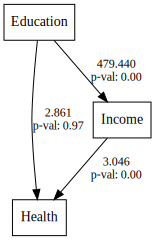

In [5]:
# 推定結果
estimates = model.inspect()
display(estimates)

# DAGの表示し、推定結果を表示する
plot.semplot(model, 'output_semplot.png')

lval, op, rval, Estimate, Std. Err, z-value, p-valueの各項目は、構造方程式モデリング（SEM）の推定結果を表しています。

それぞれの意味は以下の通りです。

    lval（Left Variable）：
方程式の左辺にある変数、つまり目的変数（従属変数、結果変数）を示します。

    op（Operator）：
変数間の関係を示す演算子です。`~`は回帰関係（因果関係）を示し、`~~`は共分散または相関関係を示します。

    rval（Right Variable）：
方程式の右辺にある変数、つまり説明変数（独立変数、予測変数）を示します。

    Estimate（推定値）：
変数間の関係の強さを示す推定値です。例えば、回帰係数や共分散の値がここに表示されます。

    Std. Err（標準誤差）：
推定値の標準誤差を示します。これは推定値の不確実性を表します。

    z-value（z値）：
推定値を標準誤差で割った値です。これは標準正規分布に基づく統計量で、推定値がゼロからどれだけ離れているかを示します。

    p-value（p値）：
z値に基づくp値で、推定値が統計的に有意かどうかを示します。一般に、p値が0.05未満であれば統計的に有意とされます。

これらの項目を用いて、SEMの結果を解釈し、変数間の関係の強さや有意性を評価します。

出力されたグラフには、係数とp値（p value）が表示されています。

p値が1%(0.01)未満のとき1%有意、p値が5%(0.05)未満のとき5%有意、p値が10%(0.1)未満のとき10%有意などと言われます。

次に、モデルの適合度などを出力します。

以下、コードです。

In [6]:
from semopy import calc_stats

# 適合度の計算
stats = calc_stats(model)
display(stats.T)

,Value
DoF,1.000000
DoF Baseline,4.000000
chi2,10411.919784
chi2 p-value,0.000000
chi2 Baseline,13351.797376
CFI,0.220027
GFI,0.220186
AGFI,-2.119256
NFI,0.220186
TLI,-2.119891


適合度指標は、モデルがデータにどの程度適合しているかを示す指標です。

この出力には、DoF（自由度）、chi2（カイ二乗統計量）、CFI（比較適合指数）、GFI（適合度指数）、RMSEA（平方根平均二乗誤差近似）などが含まれています。

あとで、もう少し見方を含め説明します。

今回の例ですと、chi2 p-valueが0.000000であり、モデルがデータに上手く適合していないことを示唆しています。

また、CFIやGFIの値が低く、RMSEAが3.228210と高いことから、このモデルのデータへの適合度は低いと考えられます。

この結果から、提案されたモデルがこのデータセットに対して適切に適合しているとは言えず、モデルの構造の再検討や、データのさらなる分析が必要であることが示唆されます。

しかし、適合度指標は絶対ではありません。

適合度指標だけでSEMの良し悪しを判断すると、適合していてもリアルとかけ離れた感じになることもありますし、用途によっては適切でない場合もあります。

例えば、現実問題と照らし合わせ、有意ではなくても実務上必要な関係性はSEMに含めたりもします。

予測モデルとして利用したい場合には、全体の構造も重要ですが、予測精度も重要になります。

今回は、健康（Health）を収入（Income）と教育（Education）で予測した場合、どの程度の精度で予測されのかを、見てみます。

以下、コードです。

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# 予測されたHealthの計算
predicted_health = model.predict(
    data[['Education', 'Income']],
    intercepts=True)

# 元のHealthデータと予測されたSalesデータの比較
data['PredictedHealth'] = predicted_health['Health']
data[['Health', 'PredictedHealth']].head()

# 平均二乗誤差(MSE)と決定係数(R^2)の計算
mse = mean_squared_error(data['Health'], data['PredictedHealth'])
r2 = r2_score(data['Health'], data['PredictedHealth'])
print(' mse:', mse, '\n r2:', r2)

 mse: 4638.049513860817 
 r2: 0.9997337254050267


グラフ化し視覚的に確認します。

以下、コードです。

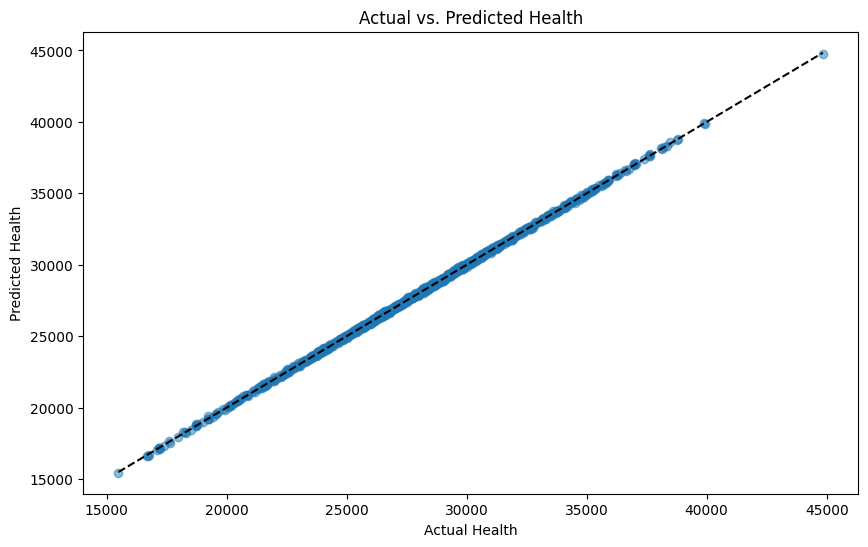

In [8]:
import matplotlib.pyplot as plt

# 予測値と実測値の散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(data['Health'], data['PredictedHealth'], alpha=0.5)
plt.title('Actual vs. Predicted Health')
plt.xlabel('Actual Health')
plt.ylabel('Predicted Health')
plt.plot(
    [data['Health'].min(), data['Health'].max()],
    [data['Health'].min(), data['Health'].max()],
    'k--')
plt.show()

以下、実行結果です。横軸が実測値（Actual Health）で縦軸が予測値（Predicted Health）です。

## 介入シミュレーション

構築したSEMを使い、教育（Education）に介入することで、健康（Health）がどのように変化するのかを見ていきます。

教育（Education）を2ポイントづつ増やす介入をした場合どうなるのかを実施してみます。

以下、コードです。



In [9]:
# 介入：Educationの値を全員に対して増加させる
data_intervened = data.copy()
data_intervened['Education'] = data['Education'] + 2

# 介入後の予測
predicted_post_intervention = model.predict(
    data_intervened[['Education']], intercepts=True)

# 結果の比較
comparison = pd.DataFrame({
    'Pre-Intervention': data['Health'],
    'Post-Intervention': predicted_post_intervention['Health'],
})

display(comparison.describe())

,Pre-Intervention,Post-Intervention
count,1000.000000,1000.000000
mean,27922.496427,30849.241649
std,4175.611450,2865.915568
min,15494.386762,21306.297946
25%,25424.432262,28897.329815
50%,27771.974766,30866.710093
75%,30493.512223,32689.028289
max,44842.190765,42068.625129


以下、実行結果です。
Pre-Interventionが介入していない場合（要は、現状）の健康（Health）を、Post-Interventionが介入した場合（要は、反事仮想）の健康（Health）の状態を意味します。

グラフ化し視覚的に確認します。

以下、コードです。

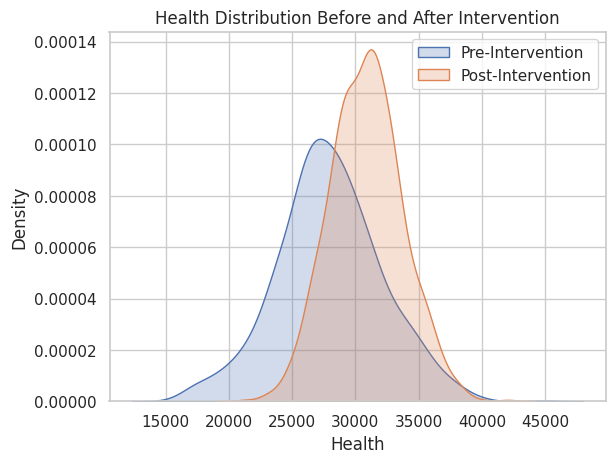

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 分布の可視化
sns.set(style='whitegrid')
sns.kdeplot(
    comparison['Pre-Intervention'],
    label='Pre-Intervention',
    fill=True)
sns.kdeplot(
    comparison['Post-Intervention'],
    label='Post-Intervention',
    fill=True)
plt.legend()
plt.title('Health Distribution Before and After Intervention')
plt.xlabel('Health')
plt.ylabel('Density')
plt.show()

## 適合度指標

semopyライブラリのcalc_stats関数は、構造方程式モデリング（SEM）の適合度を評価するために様々な統計指標を提供しています。

これらの指標は、モデルが収集したデータをどれだけ適切に表現しているかを示す重要な手がかりとなります。

calc_statsで出力される主要な適合度指標について簡単に説明します。

## Chi-square Test (χ² Test)

カイ二乗検定は、観測されたデータとモデルによる予測がどれだけ一致するかを測定します。

p値が大きい（通常は0.05以上）と、モデルがデータに適合していると考えられます。

## Root Mean Square Error of Approximation (RMSEA)

RMSEAはモデルの適合度を評価する指標で、値が小さいほど良い適合度を示します。

0.05以下が良好な適合、0.08以下が許容可能、それ以上は適合度が低いと考えられます。

## Comparative Fit Index (CFI)

CFIはモデルの適合度を比較的に評価する指標で、1に近い値が理想的です。

0.95以上で良好な適合、0.90以上で許容可能とされています。

## Tucker-Lewis Index (TLI)

TLIも適合度の一指標で、修正されたCFIと考えることができます。

0.95以上が理想的な適合度を示します。

## Standardized Root Mean Square Residual (SRMR)

SRMRは残差の平方平均の平方根を標準化したものです。

0.08以下で良好なモデルの適合を示します。

## 一覧表

これらの統計指標を用いて、SEMモデルがデータにどれだけ適合しているかを評価することができます。

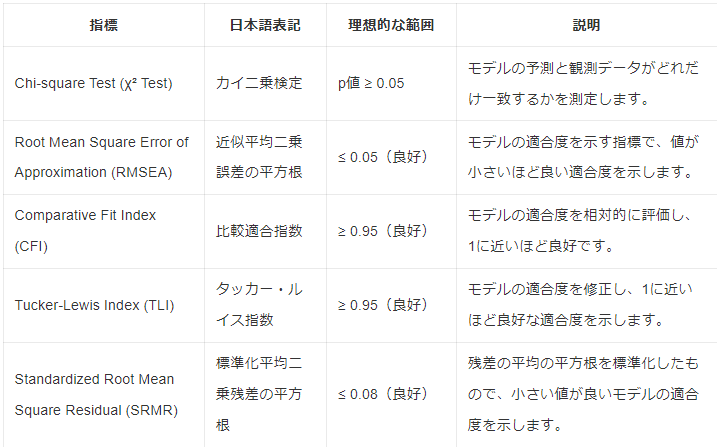

適合度指標は、モデルが現実のデータをどれだけ正確に反映しているか、またモデル改善のための方向性を示すために非常に重要です。

モデルの評価を行う際には、これらの指標を総合的に考慮し、必要に応じてモデルのパラメータ調整や構造の見直しを行うことが推奨されます。

しかし、適合度指標は絶対ではありません。

適合度指標だけでSEMの良し悪しを判断すると、適合していてもリアルとかけ離れた感じになることもありますし、用途によっては適切でない場合もあります。

例えば、現実問題と照らし合わせ、有意ではなくても実務上必要な関係性はSEMに含めたりもします。

## まとめ

前回は、CausalGraphicalModelsを使ったDAGの構築により、複雑な因果関係を可視化しました。

今回は、PythonのSEMライブラリであるsemopyを使用した、SEMのセットアップ、モデル定義、そして適合度の評価を行い、実データに適用する方法につい解説しました。

ただ、質的変数に対し弱いため、そのあたりは工夫が必要です。

特に、目的変数になる変数が質的変数のときは厄介です。

なぜならば、SEMの個々の数式が線形回帰式をベースにしており、目的変数が質的変数であっても量的変数として扱われるからです。

R言語のlavaanライブラリを使うか、ロジスティック回帰モデルをパスごとに独立して推定するパス解析を実施するか、どちらかになることでしょう。

次回は、質的変数が登場するものの、すべて説明変数の場合の例について説明します。

質的変数が、順序データの場合には順序コーディングかダミーコード化（OneHotEncode）、非順序データの場合にはダミーコード化（OneHotEncode）することで、semopyで扱うことができます。